## Project 1: Sales Data Cleaning and Visualization | Proyecto 1: Limpieza y Visualización de Datos de Ventas

### Project Objective | Objetivo del Proyecto

The objective of this project is to perform a detailed analysis of the sales data of a store that sells electronic products. Through this project, we will seek to clean the data set, identify patterns and generate visualizations that allow a better understanding of sales behavior by product and over time. This will allow informed decisions to be made about inventory management and marketing strategie.
________________________________________________________________________________________________________________________________________________________

El objetivo de este proyecto es realizar un análisis detallado de los datos de ventas de una tienda que comercializa productos electrónicos. A través de este proyecto, se buscará limpiar el conjunto de datos, identificar patrones y generar visualizaciones que permitan entender mejor el comportamiento de las ventas por producto y a lo largo del tiempo. Esto permitirá tomar decisiones informadas sobre la gestión de inventario y estrategias de marketing.

### Code | Codigo

#### Importar las librerias y cargar la base de datos

In [157]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import gdown

URL = 'https://drive.google.com/uc?id=1FnEJfn8Ev2BZOMJeIgPUUZIBkW_adfCm'   # URL del documento
output = 'Project_1_EDAP.xlsx'   # Nombre del documento

gdown.download(URL, output, quiet=False) # Descaraga del documento Excel

df = pd.read_excel(output, engine='openpyxl') # Lectura del Excel

df.head(10) # Una muestra de la base de datos


Downloading...
From: https://drive.google.com/uc?id=1FnEJfn8Ev2BZOMJeIgPUUZIBkW_adfCm
To: C:\Users\HP\Python_with_Excel\Data_Analysis_Projects\Project_1_EDAP.xlsx
100%|██████████| 9.08k/9.08k [00:00<00:00, 2.93MB/s]


,Producto,Categoría,Fecha de Venta,Cantidad Vendida,Precio Unitario,Total Venta
0,Laptop,Electrónica,2024-01-05,3,800,2400
1,Tablet,Electrónica,2024-01-10,5,300,1500
2,Smartphone,Electrónica,2024-01-15,2,600,1200
3,Laptop,Electrónica,2024-02-10,4,800,3200
4,Smartphone,Electrónica,2024-02-20,6,600,3600
5,Tablet,Electrónica,2024-03-01,3,300,900
6,Laptop,Electrónica,2024-03-15,2,800,1600
7,Smartphone,Electrónica,2024-04-01,7,600,4200
8,Tablet,Electrónica,2024-04-10,1,300,300
9,Laptop,Electrónica,2024-04-20,5,800,4000


#### Explorar y limpiar los datos

In [155]:
df.isnull().sum() # verifica si existen celdas vacias y las concatena en una suma (0 significa que no hay valores nulos)

df.drop_duplicates(inplace=True) # Borrar valores duplicados (si los hay)

df.describe() # Resumen estadistico de los datos

,Fecha de Venta,Cantidad Vendida,Precio Unitario,Total Venta
count,10,10.000000,10.000000,10.000000
mean,2024-02-25 04:48:00,3.800000,590.000000,2290.000000
min,2024-01-05 00:00:00,1.000000,300.000000,300.000000
25%,2024-01-21 12:00:00,2.250000,375.000000,1275.000000
50%,2024-02-25 00:00:00,3.500000,600.000000,2000.000000
75%,2024-03-27 18:00:00,5.000000,800.000000,3500.000000
max,2024-04-20 00:00:00,7.000000,800.000000,4200.000000
std,NaN,1.932184,218.326972,1386.802878


##### Lo que proporciona df.describe():

- **count**: El número de valores no nulos en cada columna.
- **mean**: El promedio (media aritmética) de los valores.
- **std**: La desviación estándar, que mide la dispersión de los datos respecto a la media.
- **min**: El valor mínimo en cada columna.
- **25%**: El primer cuartil (percentil 25), que es el valor por debajo del cual se encuentra el 25% de los datos.
- **50%** (mediana): El segundo cuartil o percentil 50, que divide los datos en dos mitades.
- **75%**: El tercer cuartil (percentil 75), por debajo del cual se encuentra el 75% de los datos.
- **max**: El valor máximo en cada columna.olumna.

#### Análisis exploratorio de los datos

In [153]:
sales_by_product = df.groupby('Producto')['Cantidad Vendida'].sum()  # Agrupar los productos y mostrar la cantidad vendida de cada producto
print(sales_by_product)
print('_____________')
revenue_by_product = df.groupby('Producto')['Total Venta'].sum()  # Agrupar los productos y mostra los ingresos de cada producto sumando su cantidad 
print(revenue_by_product)

Producto
Laptop        14
Smartphone    15
Tablet         9
Name: Cantidad Vendida, dtype: int64
_____________
Producto
Laptop        11200
Smartphone     9000
Tablet         2700
Name: Total Venta, dtype: int64


#### Visualización de los datos
**Gráfico de Barras**: Cantidad vendida por producto

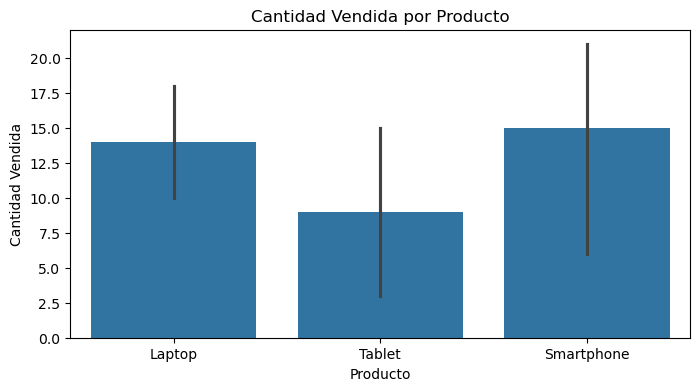

In [151]:
plt.figure(figsize=(8,4))  # Tamaño del Gráfico
sns.barplot(x='Producto', y='Cantidad Vendida', data=df, estimator=sum) # Labels y data= la del daframe osea el excel
plt.title('Cantidad Vendida por Producto')  
plt.show()

**Gráfico de líneas**: Ventas a lo largo del tiempo

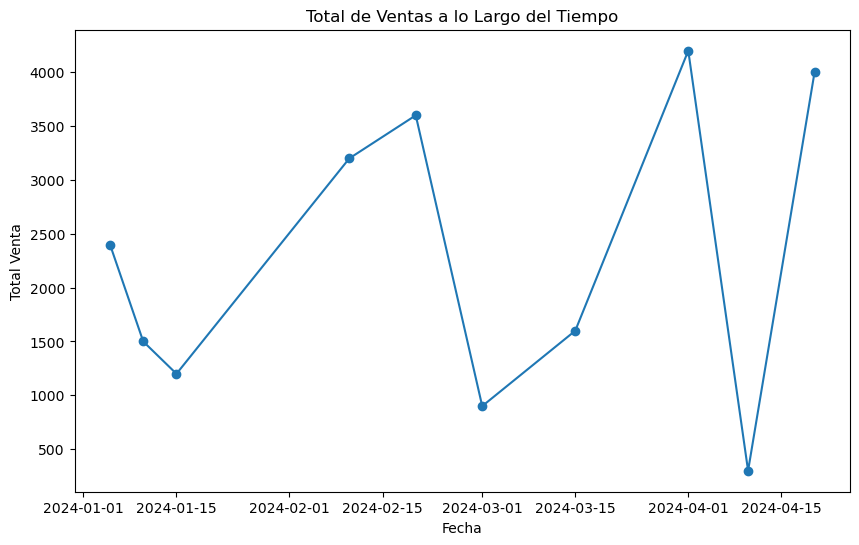

In [159]:
# Convertir la columna de fechas a formato datetime
df['Fecha de Venta'] = pd.to_datetime(df['Fecha de Venta'])

# Gráfico de líneas de Total Venta a lo largo del tiempo
plt.figure(figsize=(10,6))   # Tamaño del Gráfico
plt.plot(df['Fecha de Venta'], df['Total Venta'], marker='o') # Datos para gráficar
plt.title('Total de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Venta')
plt.show()

#### Conclusión

**¿Qué producto generó más ingresos?**

- El producto que generó más ingresos es el que tiene la mayor suma en la columna "Total Venta" después de agrupar los datos por productos. Esto se puede determinar utilizando el código que agrupa y suma los ingresos por producto:

In [161]:
producto_mayor_ingreso = ingresos_por_producto.idxmax()
ingreso_maximo = ingresos_por_producto.max()

print(f"El producto que generó más ingresos es {producto_mayor_ingreso}, con un total de ingresos de {ingreso_maximo}.")


El producto que generó más ingresos es Laptop, con un total de ingresos de 11200.


**¿Qué tendencias se observan en las ventas a lo largo del tiempo?**

- Para identificar las tendencias en las ventas, es importante observar cómo varían las cantidades vendidas y los ingresos a lo largo del tiempo. 

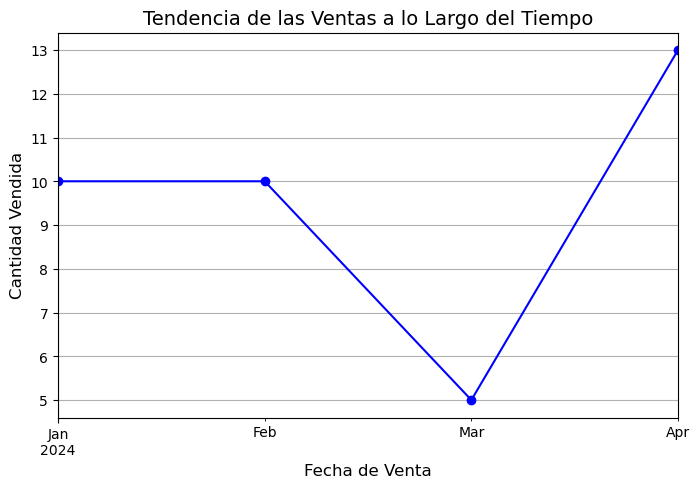

In [180]:
# Convertir la columna 'Fecha' a formato datetime (si no lo está)
df['Fecha de Venta'] = pd.to_datetime(df['Fecha de Venta'])

# Agrupar los datos por mes y sumar las ventas
ventas_mensuales = df.groupby(df['Fecha de Venta'].dt.to_period('M'))['Cantidad Vendida'].sum()

# Crear una gráfica de ventas mensuales
plt.figure(figsize=(8,5))
ventas_mensuales.plot(kind='line', marker='o', color='b')

# Etiquetas y título
plt.title('Tendencia de las Ventas a lo Largo del Tiempo', fontsize=14)
plt.xlabel('Fecha de Venta', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)

# Mostrar gráfica
plt.grid(True)
plt.show()


Posibles tendencias a observar:
- Crecimiento constante: Las ventas pueden estar aumentando de forma constante con el tiempo despues del mes de Marzo.
- Estacionalidad: Picos o caídas en ventas durante ciertos meses o temporadas.
- Decrecimiento: Si las ventas disminuyen con el tiempo, puede reflejar una pérdida de interés en el producto.